## 2.6 Scatterplots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [6]:
vic_elec = (pd.read_csv('../data/tsibbledata/vic_elec.csv')
 .assign(Time=lambda df: pd.to_datetime(df['Time']))
 .assign(Date=lambda df: pd.to_datetime(df['Date']))
 ) 

In [ ]:
from plotnine import ggplot, geom_line, labs, aes, theme, geom_point
from plotnine import facet_grid

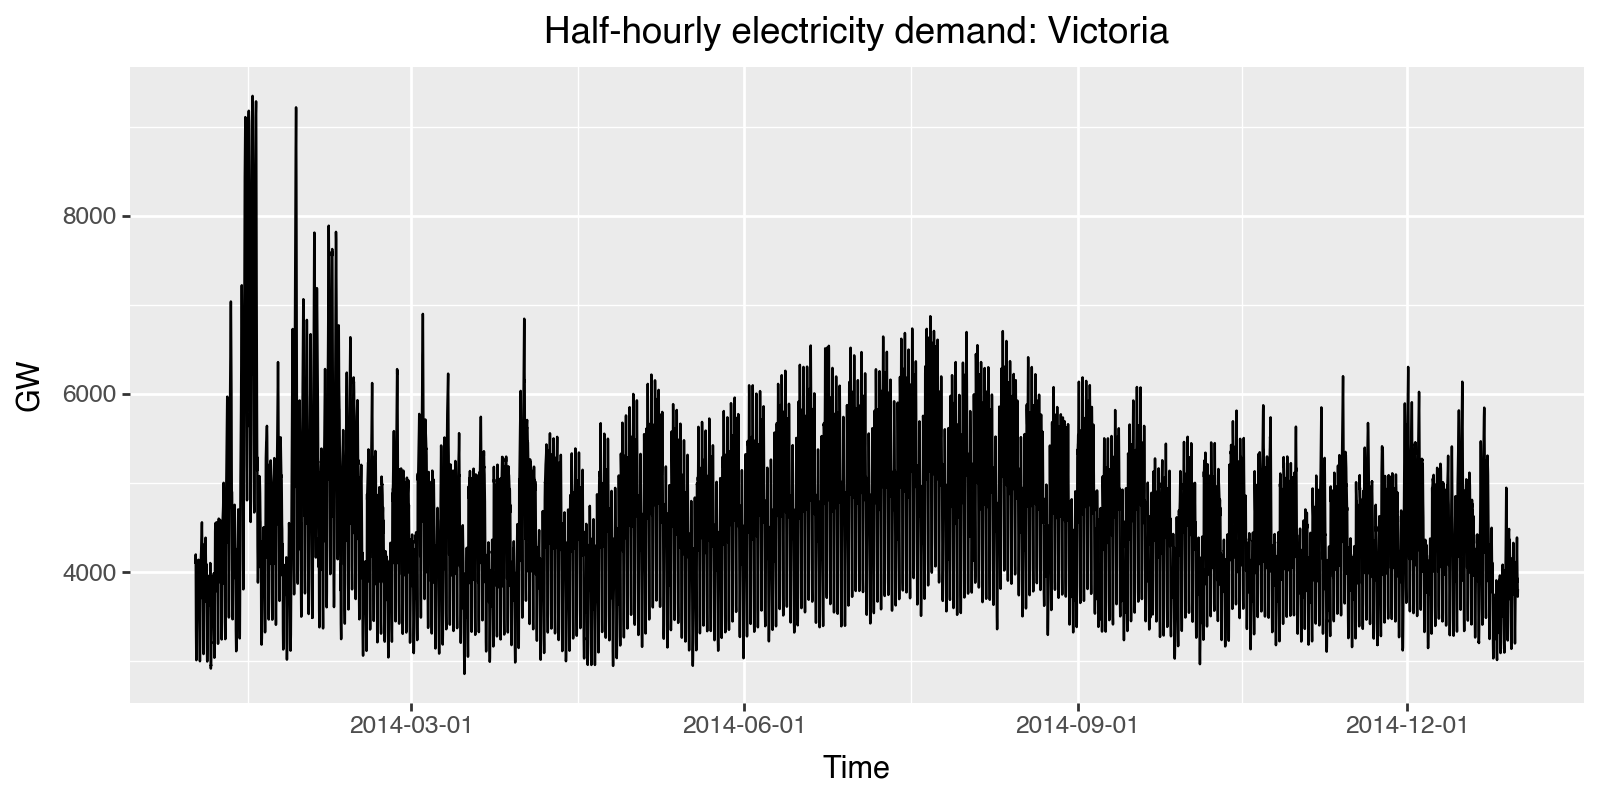

In [21]:
ggplot(vic_elec.query('Date.dt.year == 2014')) \
    + aes(x='Time', y='Demand') \
    + geom_line() \
    + labs(y = "GW",
       title = "Half-hourly electricity demand: Victoria") \
    + theme(figure_size=(8, 4))

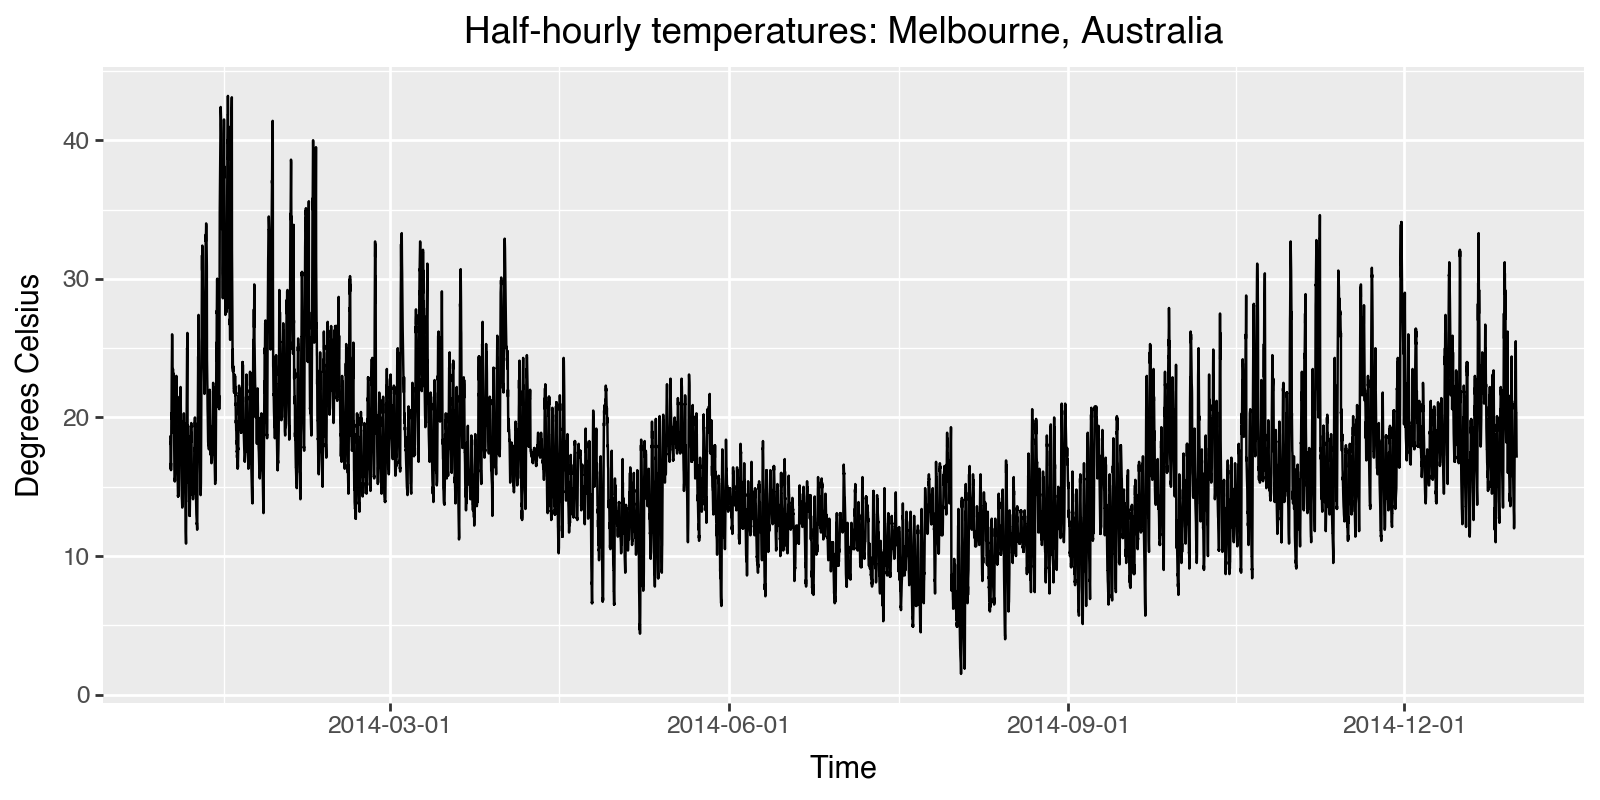

In [20]:
ggplot(vic_elec.query('Date.dt.year == 2014')) \
    + aes(x='Time', y='Temperature') \
    + geom_line() \
    + labs(y = "Degrees Celsius",
    title = "Half-hourly temperatures: Melbourne, Australia") \
    + theme(figure_size=(8, 4))

We can study the relationship between demand and temperature by plotting one series against the other.




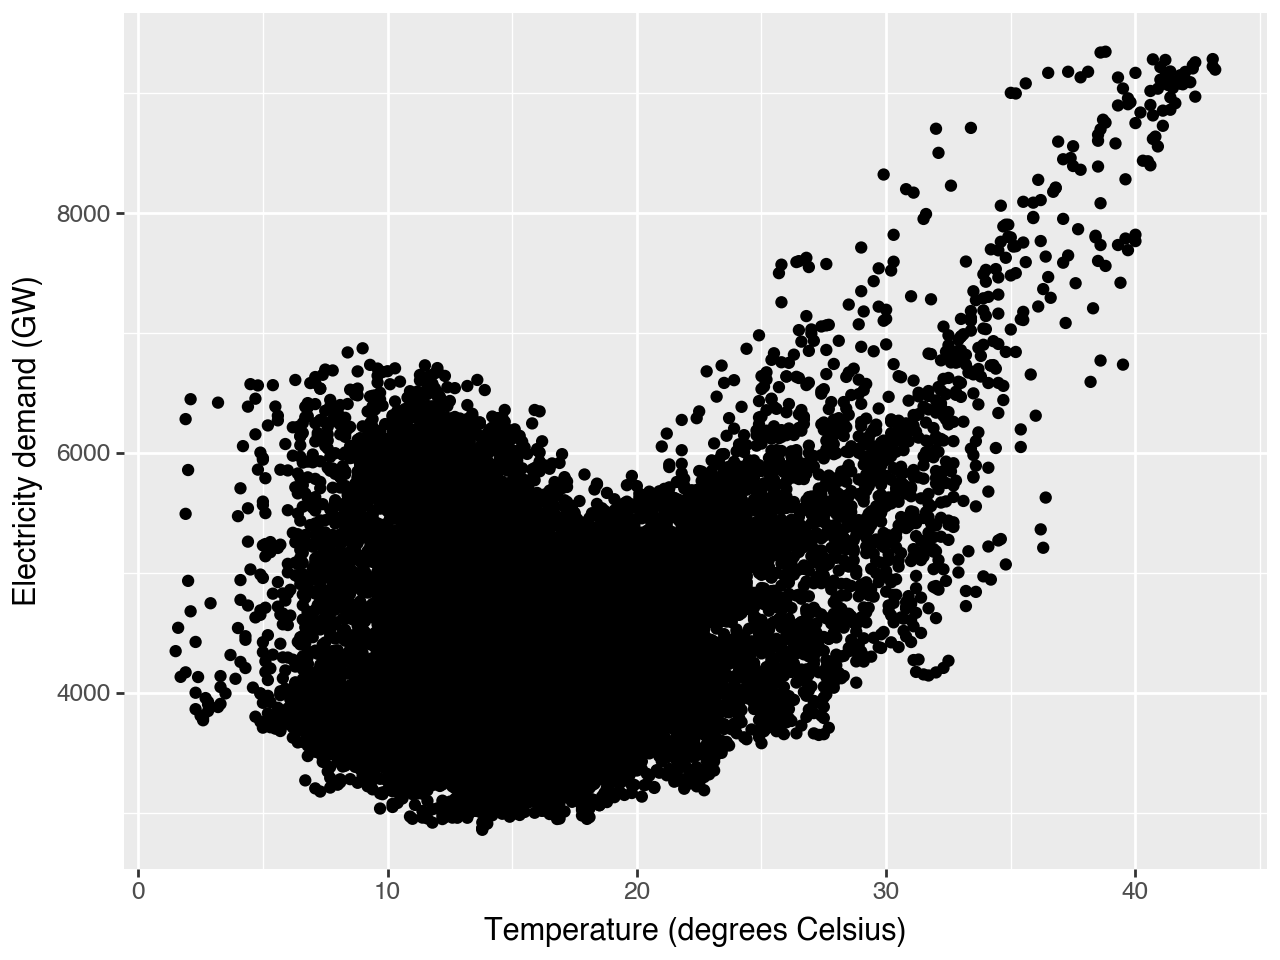

In [23]:
ggplot(vic_elec.query('Date.dt.year == 2014')) \
    + aes(x='Temperature', y='Demand') \
    + geom_point() \
    + labs(x = "Temperature (degrees Celsius)",
       y = "Electricity demand (GW)")

This scatterplot helps us to visualise the relationship between the variables. It is clear that high demand occurs when temperatures are high due to the effect of air-conditioning. But there is also a heating effect, where demand increases for very low temperatures.

### Correlation
The correlation between variables $x$ and $y$ is given by
$$
r = \frac{\sum(x_t - \bar{x})(y_t-\bar{y})}{\sqrt{\sum(x_t-\bar{x})^2}\sqrt{\sum(y_t-\bar{y})^2}}
$$

In [ ]:
df_tourism = pd.read_csv('../data/tsibble/tourism.csv')
df_tourism['Date'] = pd.to_datetime([
    '-'.join(x.split()) for x in df_tourism['Quarter']])

In [32]:
visitors = (df_tourism
    .groupby(['State', 'Date'])
    .agg({'Trips': 'sum'})
    .reset_index()
)

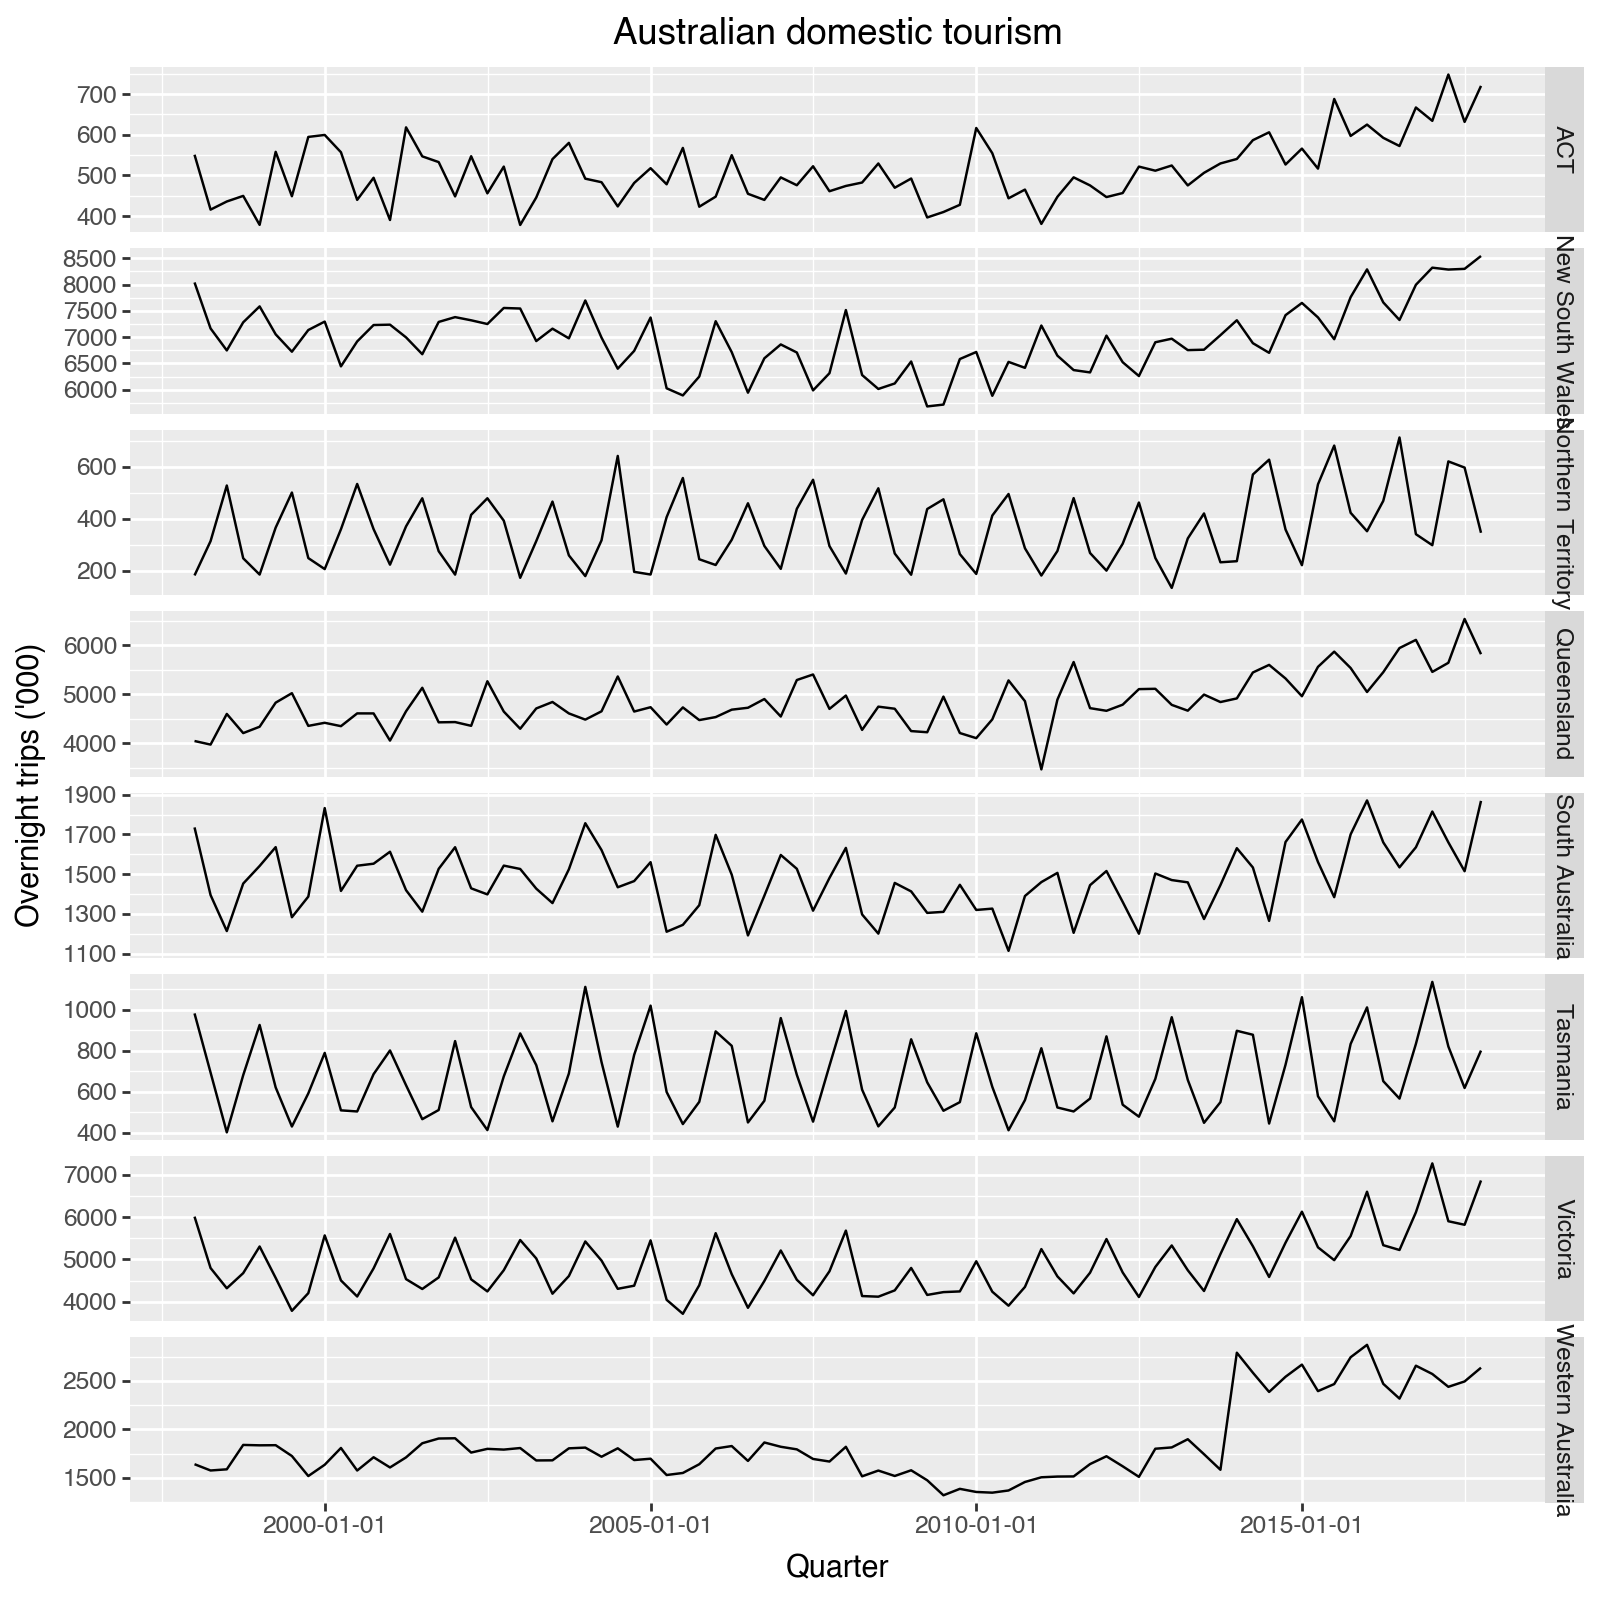

In [36]:
ggplot(visitors) \
    + aes(x='Date', y='Trips') \
    + geom_line() \
    + facet_grid(rows='State', scales='free_y') \
    + labs(title = "Australian domestic tourism",
       x = 'Quarter',
       y= "Overnight trips ('000)") \
    + theme(figure_size=(8, 8))

### Pairplot with correlations

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn
sns.set(font_scale=1.0)

In [45]:
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

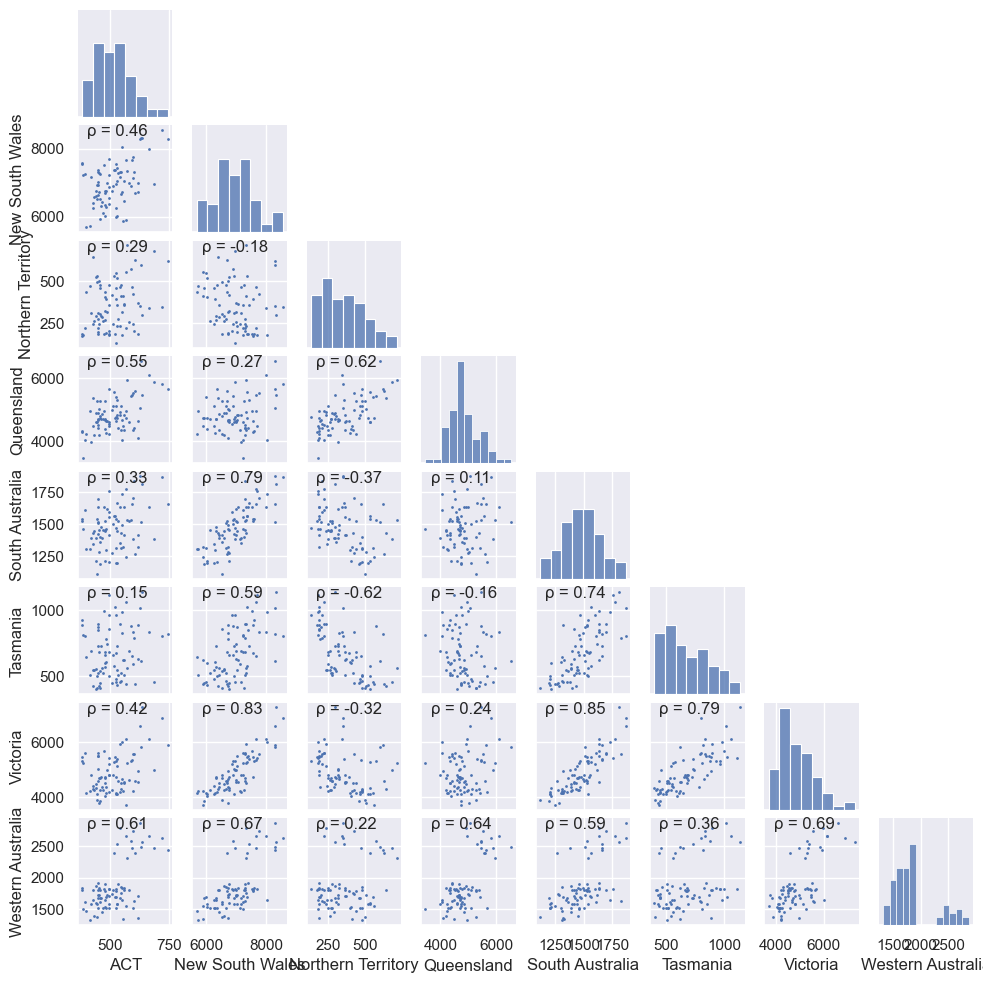

In [ ]:
d = visitors.pivot(index='Date', columns='State', values='Trips')
g = sns.pairplot(d, plot_kws=dict(linewidth=0, s=4), corner=True, height=1.25)
g.map_lower(corrfunc)
plt.show();

We can also plot something similar using `scatter_ellipse` in `statsmodels`, which will automatically compute the correlation as well.

In [61]:
from statsmodels.graphics.plot_grids import scatter_ellipse

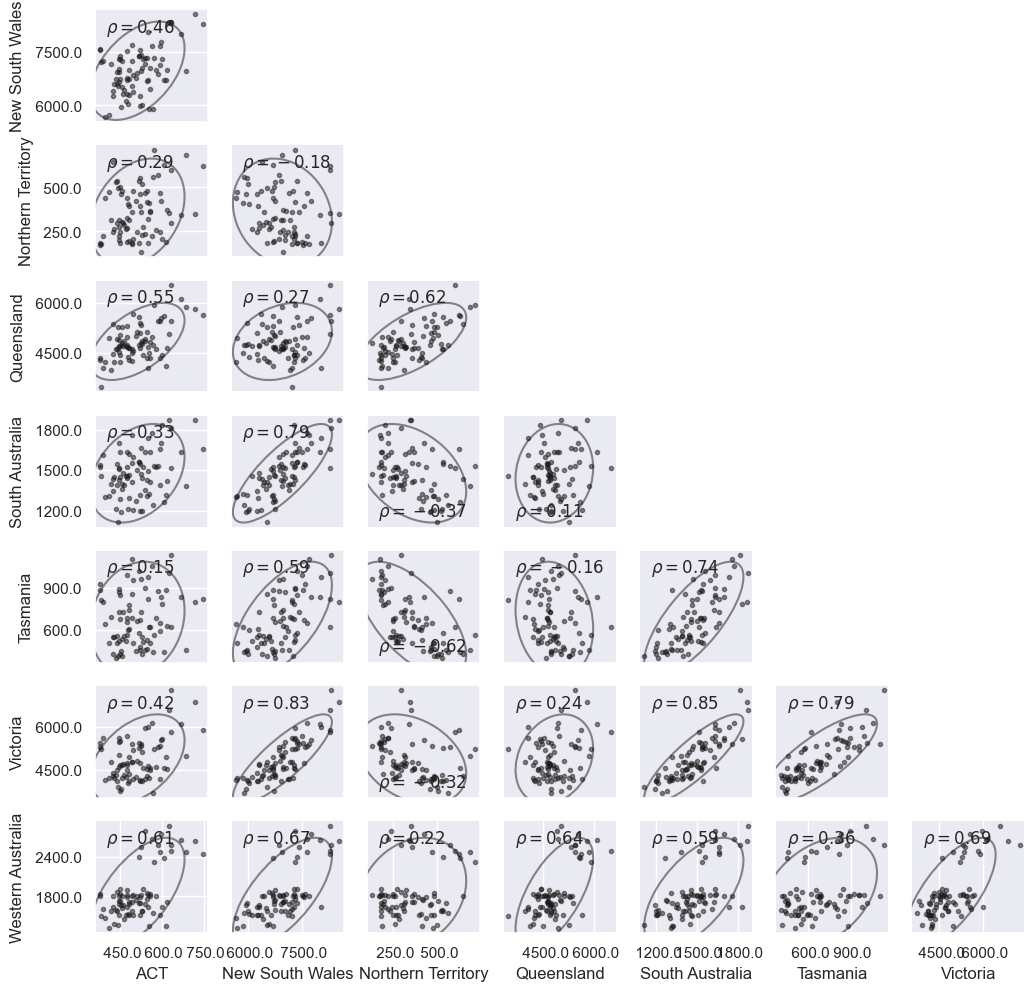

In [60]:
fig = plt.figure(figsize=(12, 12))
scatter_ellipse(d, varnames=d.columns, fig=fig)